In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as tfl

Using TensorFlow backend.


# Data Reading and Labeling

In [2]:
#loading data from the mnist dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

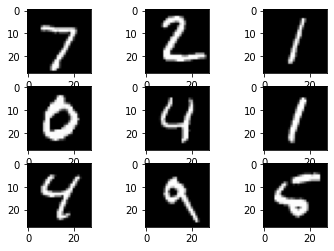

In [3]:
# Plotting the input images
from matplotlib import pyplot

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(test_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# Preprocessing steps

In [4]:
# converting Y to categorical values
# expanding the input by 1 axis to feed it to conv2D neural network

train_y = np_utils.to_categorical(train_y, 10)
print(f'shape of train_y: {train_y.shape}')
test_y = np_utils.to_categorical(test_y, 10)
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
print(f'Shape of train_X: {test_X.shape}')

shape of train_y: (60000, 10)
Shape of train_X: (10000, 28, 28, 1)


# Define the model 

In [5]:
#Defining the model and the loss function (categorical_crossentropy)

model = Sequential()
model.add(tfl.Conv2D(20, (5,5),activation='relu', input_shape = (28, 28, 1)))
model.add(tfl.MaxPool2D((2,2), strides = (2,2)))
model.add(tfl.Conv2D(50, (5,5), activation='relu'))
model.add(tfl.MaxPool2D((2,2), strides = (2,2)))
model.add(tfl.Dropout(0.5))
model.add(tfl.Flatten())
model.add(tfl.Dense(500,activation='relu'))
model.add(tfl.Dropout(0.5))
model.add(tfl.Dense(10, activation='softmax'))


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

# Viewing model_configuration
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               4

In [6]:
#train and fit with appropriate batch size, epochs and validation set
history = model.fit(train_X, train_y, validation_split=0.1, batch_size = 50, epochs=5)

Epoch 1/2
1080/1080 [==============================] - 40s 36ms/step - loss: 0.9525 - accuracy: 0.8221 - val_loss: 0.0796 - val_accuracy: 0.9790
Epoch 2/2
1080/1080 [==============================] - 33s 31ms/step - loss: 0.1982 - accuracy: 0.9405 - val_loss: 0.0579 - val_accuracy: 0.9823


In [15]:
def Loss_per_epoch(history):
    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('epochs')
    plt.show()

In [40]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
def Model_metrics(test_x, test_y):
    score = model.evaluate(test_x, test_y)
    print('Test Loss:', score[0])
    print('Test accuracy:', score[1])

In [58]:
# Predict model on Test Data and plot confusion matrix
def Confusion_matrix(test_X, test_y):
    Y_pred = model.predict(test_X)
    print(Y_pred)

    # Printing the confusion matrix
    from sklearn.metrics import classification_report,confusion_matrix
    import itertools

    # Print the classes of the Prediction
    y_pred = np.argmax(model.predict(test_X),axis =1)
    print(y_pred.shape)

    target_names = ['0','1','2','3','4','5','6','7','8','9']

    # Plotting the confusion matrix
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    #Computation  confusion matrix
    #print(np.argmax(y_test,axis=1))
    cnf_matrix = (confusion_matrix(np.argmax(test_y,axis=1), y_pred))

    np.set_printoptions(precision=3)

    plt.figure()

    # Plotting non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=target_names,
                          title='Confusion matrix')
    plt.show()

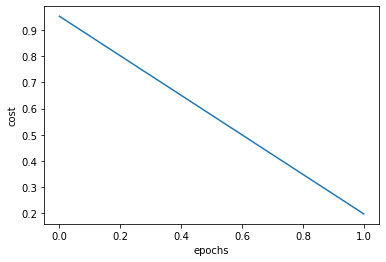

In [16]:
#print the loss per iteration
Loss_per_epoch(history)

In [43]:
#plotting the model metrics
Model_metrics(test_X, test_y)

313/313 [==============================] - 3s 10ms/step - loss: 0.0422 - accuracy: 0.9873
Test Loss: 0.042164117097854614
Test accuracy: 0.9872999787330627


[[2.207e-10 1.028e-08 5.310e-07 ... 1.000e+00 4.173e-09 7.925e-07]
 [3.240e-08 6.598e-08 1.000e+00 ... 2.291e-09 4.122e-09 7.521e-10]
 [5.154e-05 9.991e-01 3.090e-04 ... 5.258e-05 3.389e-04 2.168e-05]
 ...
 [4.656e-13 5.429e-09 5.540e-11 ... 1.409e-07 1.423e-06 3.920e-07]
 [1.014e-08 1.123e-10 3.533e-10 ... 2.010e-08 2.119e-05 5.703e-07]
 [7.921e-08 6.975e-10 1.536e-08 ... 3.036e-12 6.214e-09 3.969e-11]]
(10000,)
Confusion matrix, without normalization
[[ 969    0    4    0    1    0    4    0    1    1]
 [   3 1127    0    1    0    0    2    1    1    0]
 [   0    0 1025    0    0    0    1    5    1    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    0    2    0  966    0    4    0    1    9]
 [   0    0    0   11    0  876    3    1    1    0]
 [   1    3    1    0    2    1  949    0    1    0]
 [   0    6    6    2    1    0    0 1011    0    2]
 [   0    0    3    2    2    3    2    0  962    0]
 [   0    3    0    4    7    4    0    3    6  982]]


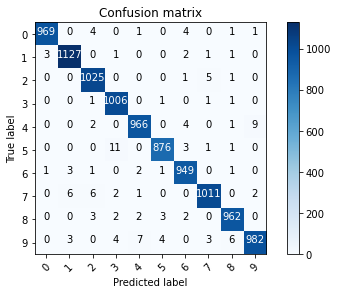

In [44]:
#plotting the confusion matrix
Confusion_matrix(test_X,test_y)